# 데이터 전처리 과정

In [1]:
import pandas as pd
import numpy as np
df_factor = pd.read_csv("ECOS_240429.csv")

df_factor.drop(df_factor.columns[:6], axis=1, inplace=True)

df_factor = df_factor.transpose()

df_add = ['INF', 'M1', 'M2', 'BR', 'DY', 'CD', 'CP', 'T1', 'T3', 'T5', 'T10', 'AAA', 'BBB', 'UR', 'USDKRW', 'CIL', 'CIC', 'EAI']

df_factor.columns = df_add

df_factor

,INF,M1,M2,BR,DY,CD,CP,T1,T3,T5,T10,AAA,BBB,UR,USDKRW,CIL,CIC,EAI
2001/01,64.604,"196,612.7","709,324.5",5.25,NaN,6.43,6.97,6.040,5.990,6.200,6.650,7.760,11.650,4.4,"1,265.50",96.9,100.3,28.48
2001/02,64.919,"199,562.1","716,902.9",5.00,NaN,5.73,6.29,5.510,5.430,5.760,6.410,6.790,11.640,4.6,"1,245.70",96.6,99.9,30.24
2001/03,65.488,"204,767.6","717,361.7",5.00,NaN,5.68,6.14,5.810,5.840,6.400,7.000,7.160,12.060,4.6,"1,328.00",96.7,99.8,32.60
2001/04,65.74,"204,280.8","718,233.7",5.00,NaN,5.84,6.14,6.200,6.590,7.240,7.740,7.910,12.620,4.1,"1,324.70",96.8,99.6,28.45
2001/05,65.677,"206,315.6","725,067.5",5.00,NaN,5.85,6.13,6.100,6.460,7.050,7.580,7.700,12.240,3.9,"1,292.90",97.2,99.8,30.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/11,112.67,"1,198,966.9","3,890,972.4",3.50,1.94,3.83,4.36,3.722,3.771,3.818,3.890,4.583,10.978,2.8,"1,289.00",100.1,99.7,133.15
2023/12,112.71,"1,217,748.8","3,914,316.8",3.50,1.83,3.83,4.34,3.516,3.350,3.371,3.415,4.076,10.529,3.2,"1,289.40",100.3,99.6,132.78
2024/01,113.15,"1,221,110.0","3,924,203.2",3.50,1.93,3.74,4.28,3.384,3.266,3.302,3.353,4.013,10.453,3.0,"1,330.60",100.3,99.7,128.33
2024/02,113.77,"1,217,657.2","3,929,857.9",3.50,1.83,3.69,4.28,3.434,3.351,3.388,3.429,4.053,10.440,2.6,"1,334.00",100.4,99.9,124.24


In [2]:
df_ppi = pd.read_csv("전산업생산지수(농림어업제외)_08102055.csv")
                     
df_ppi.drop(df_ppi.columns[:5], axis=1, inplace=True)

df_ppi = pd.DataFrame(df_ppi.transpose()[1]).rename(columns={1: 'PPI'})

df_ppi

,PPI
2001/01,54.7
2001/02,55.0
2001/03,55.1
2001/04,56.0
2001/05,56.8
...,...
2023/11,113.0
2023/12,113.4
2024/01,113.7
2024/02,115.0


In [3]:
df_factor = pd.concat([df_factor, df_ppi], axis=1)
for column in df_factor.columns:
    if df_factor[column].dtype == 'object':
        df_factor[column] = df_factor[column].str.replace(",", "").astype(float)
df_factor

,INF,M1,M2,BR,DY,CD,CP,T1,T3,T5,T10,AAA,BBB,UR,USDKRW,CIL,CIC,EAI,PPI
2001/01,64.604,196612.7,709324.5,5.25,NaN,6.43,6.97,6.040,5.990,6.200,6.650,7.760,11.650,4.4,1265.5,96.9,100.3,28.48,54.7
2001/02,64.919,199562.1,716902.9,5.00,NaN,5.73,6.29,5.510,5.430,5.760,6.410,6.790,11.640,4.6,1245.7,96.6,99.9,30.24,55.0
2001/03,65.488,204767.6,717361.7,5.00,NaN,5.68,6.14,5.810,5.840,6.400,7.000,7.160,12.060,4.6,1328.0,96.7,99.8,32.60,55.1
2001/04,65.740,204280.8,718233.7,5.00,NaN,5.84,6.14,6.200,6.590,7.240,7.740,7.910,12.620,4.1,1324.7,96.8,99.6,28.45,56.0
2001/05,65.677,206315.6,725067.5,5.00,NaN,5.85,6.13,6.100,6.460,7.050,7.580,7.700,12.240,3.9,1292.9,97.2,99.8,30.14,56.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/11,112.670,1198966.9,3890972.4,3.50,1.94,3.83,4.36,3.722,3.771,3.818,3.890,4.583,10.978,2.8,1289.0,100.1,99.7,133.15,113.0
2023/12,112.710,1217748.8,3914316.8,3.50,1.83,3.83,4.34,3.516,3.350,3.371,3.415,4.076,10.529,3.2,1289.4,100.3,99.6,132.78,113.4
2024/01,113.150,1221110.0,3924203.2,3.50,1.93,3.74,4.28,3.384,3.266,3.302,3.353,4.013,10.453,3.0,1330.6,100.3,99.7,128.33,113.7
2024/02,113.770,1217657.2,3929857.9,3.50,1.83,3.69,4.28,3.434,3.351,3.388,3.429,4.053,10.440,2.6,1334.0,100.4,99.9,124.24,115.0


In [4]:
df_factor['INF'] = df_factor['INF'].pct_change(periods=12, fill_method=None) * 100
df_factor['M1Y'] = df_factor['M1'].pct_change(periods=12, fill_method=None) * 100
df_factor['M2Y'] = df_factor['M2'].pct_change(periods=12, fill_method=None) * 100
df_factor['PPI'] = df_factor['PPI'].pct_change(periods=12, fill_method=None) * 100
df_factor['EAI'] = df_factor['EAI'].pct_change(periods=12, fill_method=None)

df_factor['M1M'] = df_factor['M1'].pct_change(fill_method=None) * 100
df_factor['M2M'] = df_factor['M2'].pct_change(fill_method=None) * 100
df_factor['UR'] = df_factor['UR'].pct_change(fill_method=None) * 100
df_factor['USDKRW'] = df_factor['USDKRW'].pct_change(fill_method=None) * 100

df_factor['CIL'] = df_factor['CIL'].diff()
df_factor['CIC'] = df_factor['CIC'].diff()
df_factor = df_factor.drop(columns=['M1', 'M2'])

df_factor

,INF,BR,DY,CD,CP,T1,T3,T5,T10,AAA,...,UR,USDKRW,CIL,CIC,EAI,PPI,M1Y,M2Y,M1M,M2M
2001/01,NaN,5.25,NaN,6.43,6.97,6.040,5.990,6.200,6.650,7.760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001/02,NaN,5.00,NaN,5.73,6.29,5.510,5.430,5.760,6.410,6.790,...,4.545455,-1.564599,-0.3,-0.4,NaN,NaN,NaN,NaN,1.500107,1.068397
2001/03,NaN,5.00,NaN,5.68,6.14,5.810,5.840,6.400,7.000,7.160,...,0.000000,6.606727,0.1,-0.1,NaN,NaN,NaN,NaN,2.608461,0.063998
2001/04,NaN,5.00,NaN,5.84,6.14,6.200,6.590,7.240,7.740,7.910,...,-10.869565,-0.248494,0.1,-0.2,NaN,NaN,NaN,NaN,-0.237733,0.121557
2001/05,NaN,5.00,NaN,5.85,6.13,6.100,6.460,7.050,7.580,7.700,...,-4.878049,-2.400544,0.4,0.2,NaN,NaN,NaN,NaN,0.996080,0.951473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/11,3.300633,3.50,1.94,3.83,4.36,3.722,3.771,3.818,3.890,4.583,...,12.000000,-4.716144,0.2,-0.1,0.071285,1.893598,-4.970670,2.345792,0.361806,0.863100
2023/12,3.157606,3.50,1.83,3.83,4.34,3.516,3.350,3.371,3.415,4.076,...,14.285714,0.031032,0.2,-0.1,0.032424,3.090909,-1.164270,2.984220,1.566507,0.599963
2024/01,2.798219,3.50,1.93,3.74,4.28,3.384,3.266,3.302,3.353,4.013,...,-6.250000,3.195285,0.0,0.1,0.158631,4.407713,1.247034,3.150797,0.276018,0.252570
2024/02,3.117919,3.50,1.83,3.69,4.28,3.434,3.351,3.388,3.429,4.053,...,-13.333333,0.255524,0.1,0.2,0.037322,3.697024,1.627923,3.026274,-0.282759,0.144098


In [5]:
df_factor['DFTP'] = df_factor['AAA'] - df_factor['T10']
df_factor['TE1'] = df_factor['T10'] - df_factor['BR']
df_factor['TE2'] = df_factor['T10'] - df_factor['T1']
df_factor['TE3'] = df_factor['T10'] - df_factor['T3']
df_factor['TE4'] = df_factor['T10'] - df_factor['T5']
df_factor['TE5'] = df_factor['CD'] - df_factor['BR']
df_factor['TE6'] = df_factor['BR'] - df_factor['T1']
df_factor['DE1'] = df_factor['BBB'] - df_factor['AAA']
df_factor['DE2'] = df_factor['BBB'] - df_factor['T10']
df_factor['DE3'] = df_factor['BBB'] - df_factor['T5']
df_factor['DE4'] = df_factor['BBB'] - df_factor['T3']
df_factor['DE5'] = df_factor['BBB'] - df_factor['T1']
df_factor['DE6'] = df_factor['BBB'] - df_factor['BR']

df_factor

,INF,BR,DY,CD,CP,T1,T3,T5,T10,AAA,...,TE3,TE4,TE5,TE6,DE1,DE2,DE3,DE4,DE5,DE6
2001/01,NaN,5.25,NaN,6.43,6.97,6.040,5.990,6.200,6.650,7.760,...,0.660,0.450,1.18,-0.790,3.890,5.000,5.450,5.660,5.610,6.400
2001/02,NaN,5.00,NaN,5.73,6.29,5.510,5.430,5.760,6.410,6.790,...,0.980,0.650,0.73,-0.510,4.850,5.230,5.880,6.210,6.130,6.640
2001/03,NaN,5.00,NaN,5.68,6.14,5.810,5.840,6.400,7.000,7.160,...,1.160,0.600,0.68,-0.810,4.900,5.060,5.660,6.220,6.250,7.060
2001/04,NaN,5.00,NaN,5.84,6.14,6.200,6.590,7.240,7.740,7.910,...,1.150,0.500,0.84,-1.200,4.710,4.880,5.380,6.030,6.420,7.620
2001/05,NaN,5.00,NaN,5.85,6.13,6.100,6.460,7.050,7.580,7.700,...,1.120,0.530,0.85,-1.100,4.540,4.660,5.190,5.780,6.140,7.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/11,3.300633,3.50,1.94,3.83,4.36,3.722,3.771,3.818,3.890,4.583,...,0.119,0.072,0.33,-0.222,6.395,7.088,7.160,7.207,7.256,7.478
2023/12,3.157606,3.50,1.83,3.83,4.34,3.516,3.350,3.371,3.415,4.076,...,0.065,0.044,0.33,-0.016,6.453,7.114,7.158,7.179,7.013,7.029
2024/01,2.798219,3.50,1.93,3.74,4.28,3.384,3.266,3.302,3.353,4.013,...,0.087,0.051,0.24,0.116,6.440,7.100,7.151,7.187,7.069,6.953
2024/02,3.117919,3.50,1.83,3.69,4.28,3.434,3.351,3.388,3.429,4.053,...,0.078,0.041,0.19,0.066,6.387,7.011,7.052,7.089,7.006,6.940


In [6]:
df_factor[['UR', 'PPI', 'CIL', 'CIC', 'EAI']] = df_factor[['UR', 'PPI', 'CIL', 'CIC', 'EAI']].shift(1)

df_factor[['M1M', 'M1Y', 'M2M', 'M2Y']] = df_factor[['M1M', 'M1Y', 'M2M', 'M2Y']].shift(2)

df_factor

,INF,BR,DY,CD,CP,T1,T3,T5,T10,AAA,...,TE3,TE4,TE5,TE6,DE1,DE2,DE3,DE4,DE5,DE6
2001/01,NaN,5.25,NaN,6.43,6.97,6.040,5.990,6.200,6.650,7.760,...,0.660,0.450,1.18,-0.790,3.890,5.000,5.450,5.660,5.610,6.400
2001/02,NaN,5.00,NaN,5.73,6.29,5.510,5.430,5.760,6.410,6.790,...,0.980,0.650,0.73,-0.510,4.850,5.230,5.880,6.210,6.130,6.640
2001/03,NaN,5.00,NaN,5.68,6.14,5.810,5.840,6.400,7.000,7.160,...,1.160,0.600,0.68,-0.810,4.900,5.060,5.660,6.220,6.250,7.060
2001/04,NaN,5.00,NaN,5.84,6.14,6.200,6.590,7.240,7.740,7.910,...,1.150,0.500,0.84,-1.200,4.710,4.880,5.380,6.030,6.420,7.620
2001/05,NaN,5.00,NaN,5.85,6.13,6.100,6.460,7.050,7.580,7.700,...,1.120,0.530,0.85,-1.100,4.540,4.660,5.190,5.780,6.140,7.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/11,3.300633,3.50,1.94,3.83,4.36,3.722,3.771,3.818,3.890,4.583,...,0.119,0.072,0.33,-0.222,6.395,7.088,7.160,7.207,7.256,7.478
2023/12,3.157606,3.50,1.83,3.83,4.34,3.516,3.350,3.371,3.415,4.076,...,0.065,0.044,0.33,-0.016,6.453,7.114,7.158,7.179,7.013,7.029
2024/01,2.798219,3.50,1.93,3.74,4.28,3.384,3.266,3.302,3.353,4.013,...,0.087,0.051,0.24,0.116,6.440,7.100,7.151,7.187,7.069,6.953
2024/02,3.117919,3.50,1.83,3.69,4.28,3.434,3.351,3.388,3.429,4.053,...,0.078,0.041,0.19,0.066,6.387,7.011,7.052,7.089,7.006,6.940


In [7]:
df_KOSPI = pd.read_csv("Kospi200_indices_240429.csv")

df_KOSPI['date'] = pd.to_datetime(df_KOSPI['date'])
df_KOSPI.set_index('date', inplace=True)

df_KOSPI = df_KOSPI.resample('M').last()[['kospi200']] #ME --> M

df_KOSPI.index = df_KOSPI.index.strftime('%Y/%m')

df_KOSPI

,kospi200
date,
2000/01,119.08
2000/02,103.17
2000/03,108.03
2000/04,91.21
2000/05,92.74
...,...
2023/12,357.99
2024/01,336.24
2024/02,355.57


In [8]:
# df_KOSPI.rename(columns = {'KOSPI200' : 'kospi200'}, inplace = True)

In [9]:
df_KOSPI['div'] = (df_factor['DY'] * 0.01) * df_KOSPI['kospi200']

df_KOSPI['R(t)'] = (df_KOSPI['kospi200'] - df_KOSPI['kospi200'].shift(1) + df_KOSPI['div']) / df_KOSPI['kospi200'].shift(1)

df_KOSPI['l1(t)'] = df_factor['T1']/12 * 0.01

df_KOSPI

,kospi200,div,R(t),l1(t)
date,,,,
2000/01,119.08,NaN,NaN,NaN
2000/02,103.17,NaN,NaN,NaN
2000/03,108.03,NaN,NaN,NaN
2000/04,91.21,NaN,NaN,NaN
2000/05,92.74,NaN,NaN,NaN
...,...,...,...,...
2023/12,357.99,6.551217,0.077154,0.002930
2024/01,336.24,6.489432,-0.042628,0.002820
2024/02,355.57,6.506931,0.076841,0.002862


In [10]:
df_KOSPI['p(t)'] = df_KOSPI['R(t)'] - df_KOSPI['l1(t)'].shift(1)

df_KOSPI = df_KOSPI.drop(columns = ['kospi200', 'div', 'R(t)', 'l1(t)'])

df_KOSPI.index = pd.to_datetime(df_KOSPI.index, format='%Y/%m')

df_KOSPI = df_KOSPI.loc['2004-01':'2023-12']

df_KOSPI.index = df_KOSPI.index.to_period('M').strftime('%Y-%m')

df_KOSPI

,p(t)
date,
2004-01,0.071070
2004-02,0.062330
2004-03,0.015144
2004-04,-0.012991
2004-05,-0.054786
...,...
2023-08,-0.015636
2023-09,-0.007412
2023-10,-0.047543


In [11]:
df_KOSPI.isnull().sum()

p(t)    0
dtype: int64

In [12]:
#  df_KOSPI.dropna(inplace=True) #새로 추가 한 부분

In [13]:
df_factor.index = pd.to_datetime(df_factor.index, format='%Y/%m')

df_factor = df_factor.loc['2004-01':'2023-12']

df_factor.index = df_factor.index.to_period('M').strftime('%Y-%m')

df_factor

,INF,BR,DY,CD,CP,T1,T3,T5,T10,AAA,...,TE3,TE4,TE5,TE6,DE1,DE2,DE3,DE4,DE5,DE6
2004-01,3.395075,3.75,1.99,4.26,4.53,4.600,4.880,5.160,5.420,5.670,...,0.540,0.260,0.51,-0.850,4.320,4.570,4.830,5.110,5.390,6.240
2004-02,3.285510,3.75,1.99,4.08,4.36,4.420,4.830,5.130,5.430,5.630,...,0.600,0.300,0.33,-0.670,4.400,4.600,4.900,5.200,5.610,6.280
2004-03,3.065654,3.75,1.83,3.93,4.17,4.250,4.580,4.880,5.260,5.370,...,0.680,0.380,0.18,-0.500,4.480,4.590,4.970,5.270,5.600,6.100
2004-04,3.251416,3.75,2.21,3.91,4.14,4.130,4.540,4.880,5.250,5.290,...,0.710,0.370,0.16,-0.380,4.470,4.510,4.880,5.220,5.630,6.010
2004-05,3.349001,3.75,2.39,3.90,4.09,4.070,4.390,4.750,5.160,5.070,...,0.770,0.410,0.15,-0.320,4.470,4.380,4.790,5.150,5.470,5.790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,3.360029,3.50,1.94,3.70,4.03,3.496,3.727,3.771,3.860,4.500,...,0.133,0.089,0.20,0.004,6.410,7.050,7.139,7.183,7.414,7.410
2023-09,3.684984,3.50,2.00,3.76,4.05,3.610,3.842,3.881,3.949,4.602,...,0.107,0.068,0.26,-0.110,6.420,7.073,7.141,7.180,7.412,7.522
2023-10,3.755955,3.50,2.16,3.82,4.21,3.741,4.031,4.142,4.272,4.827,...,0.241,0.130,0.32,-0.241,6.395,6.950,7.080,7.191,7.481,7.722
2023-11,3.300633,3.50,1.94,3.83,4.36,3.722,3.771,3.818,3.890,4.583,...,0.119,0.072,0.33,-0.222,6.395,7.088,7.160,7.207,7.256,7.478


# 모델 정의 및 학습

In [14]:
!pip install lightgbm


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\jh102\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor

# 데이터의 총 개수 계산
n = len(df_factor)

# 훈련 데이터의 크기 계산 (80%)
train_size = int(n * 0.8)

# 훈련 세트와 테스트 세트로 분할
X_train = df_factor[:train_size]
X_test = df_factor[train_size:]
y_train = df_KOSPI[:train_size]
y_test = df_KOSPI[train_size:]  

# y_train과 y_test를 1차원 배열로 변환 (필요에 따라)
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# 훈련 세트와 테스트 세트의 크기 출력
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (192, 34)
X_test shape: (48, 34)
y_train shape: (192,)
y_test shape: (48,)


In [17]:
# 인공신경망 모델의 하이퍼파라미터 설정
nn_params = {
    'hidden_layer_sizes': (34,) * 5,  # 5개의 히든 레이어, 각 레이어에 34개의 노드
    'activation': 'relu',  # 활성화 함수로 ReLU 사용
    'max_iter': 100,  # 최대 100번의 반복 학습
    'early_stopping': True,  # 조기 종료 사용
    'random_state': 42  # 난수 시드 고정
}

# 서포트 벡터 머신 모델의 하이퍼파라미터 설정
svm_params = {
    'kernel': 'rbf',  # RBF 커널 사용
    'gamma': 'scale'  # gamma 값은 'scale'로 설정
}

# 랜덤 포레스트 모델 (LightGBM)의 하이퍼파라미터 설정
rf_params = {
    'num_leaves': 31,  # 최대 리프 노드 수
    'max_depth': 8,  # 트리의 최대 깊이
    'learning_rate': 0.1,  # 학습률
    'n_estimators': 150,  # 결정 트리의 개수
    'min_child_samples': 12,  # 내부 노드의 최소 샘플 수
    'min_data_in_leaf': 12,  # 리프 노드의 최소 샘플 수
    'random_state': 42,  # 난수 시드 고정
    'verbose': -1  # 로그 메시지 비활성화
}

models = {
    'Linear Regression': LinearRegression(),  # 선형 회귀 모델
    'Random Forest': LGBMRegressor(**rf_params),  # 랜덤 포레스트 모델 (LightGBM 사용)
    'Support Vector Machine': SVR(**svm_params),  # 서포트 벡터 머신 모델
    'Neural Network': MLPRegressor(**nn_params)  # 인공신경망 모델
}

### Neural Network Parameters (NN Params)
1. **hidden_layer_sizes**: 이 매개변수는 은닉층의 구조를 정의합니다. `(34,) * 5`는 5개의 은닉층을 가지며 각 층에 34개의 뉴런이 있음을 의미합니다.
2. **activation**: 활성화 함수는 'relu'입니다. 이는 뉴런의 출력을 비선형으로 변환합니다.
3. **max_iter**: 최대 반복 횟수는 100입니다. 이는 모델 훈련의 최대 에포크 수를 정의합니다.
4. **early_stopping**: 조기 종료는 `True`로 설정되어 있습니다. 이는 검증 점수가 향상되지 않을 때 훈련을 일찍 중지합니다.
5. **random_state**: 난수 시드 값은 42로 설정되어 있습니다. 이는 재현성을 위해 사용됩니다.

### Support Vector Machine Parameters (SVM Params)
1. **kernel**: 커널 유형은 'rbf'입니다. 이는 데이터의 비선형 분리를 가능하게 합니다.
2. **gamma**: 'scale'로 설정되어 있습니다. 이는 데이터의 분산에 따라 gamma 값을 자동으로 설정합니다.

### Random Forest Parameters (RF Params)
1. **num_leaves**: 리프 노드의 수는 31입니다. 이는 결정 트리의 최대 리프 수를 정의합니다.
2. **max_depth**: 최대 깊이는 8입니다. 이는 트리의 최대 깊이를 제한합니다.
3. **learning_rate**: 학습률은 0.1입니다. 이는 모델이 매 단계에서 업데이트되는 비율을 정의합니다.
4. **n_estimators**: 추정기의 수는 150입니다. 이는 사용할 결정 트리의 수를 나타냅니다.
5. **min_child_samples**: 내부 노드 당 최소 샘플 수는 12입니다. 이는 노드가 분할되기 위한 최소 샘플 수를 정의합니다.
6. **min_data_in_leaf**: 리프 당 최소 샘플 수는 12입니다. 이는 리프 노드에 있어야 하는 최소 샘플 수를 정의합니다.
7. **random_state**: 난수 시드 값은 42로 설정되어 있습니다. 이는 재현성을 위해 사용됩니다.
8. **verbose**: 로깅 메시지를 비활성화하기 위해 -1로 설정되어 있습니다.

# 모델 평가 및 순위 계산

In [18]:
def calculate_metrics(y_true, y_pred):
    # RMSE (Root Mean Squared Error) 계산
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    # MAE (Mean Absolute Error) 계산
    mae = mean_absolute_error(y_true, y_pred)
    
    # MAPE (Mean Absolute Percentage Error) 계산
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    
    # y_true와 y_pred 간의 상관계수 계산
    corr = np.corrcoef(y_true.T, y_pred.T)[0, 1]
    
    # 예측 값의 부호가 실제 값의 부호와 일치하는 비율 계산
    sign_accuracy = np.mean(np.sign(y_true) == np.sign(y_pred))
    
    # 실제 값과 예측 값의 방향 정확도 계산
    directional_accuracy = np.mean((np.diff(y_true, axis=0) > 0) == (np.diff(y_pred, axis=0) > 0))
    
    # 계산된 메트릭 반환
    return {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'Correlation': corr,
        'Sign Accuracy': sign_accuracy,
        'Directional Accuracy': directional_accuracy
    }

In [19]:
# 모델 학습 및 평가
results = {}
for model_name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train)  # .values.ravel() 사용하여 2D 배열을 1D로 변환
    
    # 테스트 데이터에 대한 예측
    y_pred = model.predict(X_test)
    
    # 예측 결과와 실제 값으로 메트릭 계산 및 저장
    results[model_name] = calculate_metrics(y_test, y_pred)  # .values 사용하여 2D 배열을 1D로 변환

# 평가 결과를 데이터프레임으로 변환하여 출력
results_df = pd.DataFrame(results).T
results_df

C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

,RMSE,MAE,MAPE,Correlation,Sign Accuracy,Directional Accuracy
Linear Regression,0.064278,0.051018,1.598016,0.338800,0.583333,0.744681
Random Forest,0.051405,0.040383,1.211354,0.550750,0.687500,0.659574
Support Vector Machine,0.061525,0.049928,1.364575,0.237356,0.625000,0.659574
Neural Network,0.135284,0.107051,4.560933,-0.025119,0.541667,0.595745


In [20]:
# 각 지표에 대해 모델의 순위를 매기기
results_df['RMSE_rank'] = results_df['RMSE'].rank()
results_df['MAE_rank'] = results_df['MAE'].rank()
results_df['MAPE_rank'] = results_df['MAPE'].rank()
# results_df['Correlation_rank'] = results_df['Correlation'].rank(ascending=False)  # 상관관계는 클수록 좋음
# results_df['Sign Accuracy_rank'] = results_df['Sign Accuracy'].rank(ascending=False)  # 클수록 좋음
# results_df['Directional Accuracy_rank'] = results_df['Directional Accuracy'].rank(ascending=False)  # 클수록 좋음

# 각 지표의 순위를 합산하여 종합 순위 계산
results_df['Total_rank'] = results_df[['RMSE_rank', 'MAE_rank', 'MAPE_rank']].sum(axis=1)
# , 'Correlation_rank', 'Sign Accuracy_rank', 'Directional Accuracy_rank'
# 종합 순위가 가장 낮은 모델 선택
best_model_name = results_df['Total_rank'].idxmin()
best_model_metrics = results_df.loc[best_model_name]

# 최적의 모델 출력
print(f"The best model is: {best_model_name}")

# 결과 데이터프레임 출력
results_df

The best model is: Random Forest


,RMSE,MAE,MAPE,Correlation,Sign Accuracy,Directional Accuracy,RMSE_rank,MAE_rank,MAPE_rank,Total_rank
Linear Regression,0.064278,0.051018,1.598016,0.338800,0.583333,0.744681,3.0,3.0,3.0,9.0
Random Forest,0.051405,0.040383,1.211354,0.550750,0.687500,0.659574,1.0,1.0,1.0,3.0
Support Vector Machine,0.061525,0.049928,1.364575,0.237356,0.625000,0.659574,2.0,2.0,2.0,6.0
Neural Network,0.135284,0.107051,4.560933,-0.025119,0.541667,0.595745,4.0,4.0,4.0,12.0


# 순열 특성 중요도 계산

In [21]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from collections import defaultdict

# 모델별로 특성 중요도 평가 함수 정의
def get_feature_importances(model, X_train, y_train):
    result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)
    return result.importances_mean

In [22]:
# 각 모델에 대해 특성 중요도 계산
feature_importances = {}
for model_name, model in models.items():
    importances = get_feature_importances(model, X_train, y_train)
    feature_importances[model_name] = importances

# 데이터프레임으로 변환
feature_importances_df = pd.DataFrame(feature_importances, index=X_train.columns)

# 각 모델에 대해 평균 중요도를 초과하는 중요한 특성 식별
important_features = defaultdict(list)
model_selected_features = {}

for model_name in models.keys():
    mean_importance = feature_importances_df[model_name].mean()
    selected_features = feature_importances_df[feature_importances_df[model_name] > mean_importance].index.tolist()
    model_selected_features[model_name] = selected_features
    for feature in selected_features:
        important_features[feature].append(model_name)

# 각 모델의 중요한 특성 리스트를 동일한 길이로 맞추기
max_len = max(len(features) for features in model_selected_features.values())

for model_name in model_selected_features.keys():
    selected_features = model_selected_features[model_name]
    if len(selected_features) < max_len:
        selected_features.extend([np.nan] * (max_len - len(selected_features)))
    model_selected_features[model_name] = selected_features

# 중요한 특성 데이터프레임 생성
important_features_df = pd.DataFrame(model_selected_features)

# 중요한 특성 데이터프레임 출력
important_features_df

C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

,Linear Regression,Random Forest,Support Vector Machine,Neural Network
0,BR,INF,UR,BR
1,CP,T1,USDKRW,T10
2,AAA,AAA,PPI,AAA
3,USDKRW,UR,M1Y,BBB
4,DE1,USDKRW,M2Y,UR
5,DE3,M1M,NaN,USDKRW
6,DE6,TE5,NaN,PPI
7,NaN,NaN,NaN,M1Y
8,NaN,NaN,NaN,M2Y
9,NaN,NaN,NaN,DE4


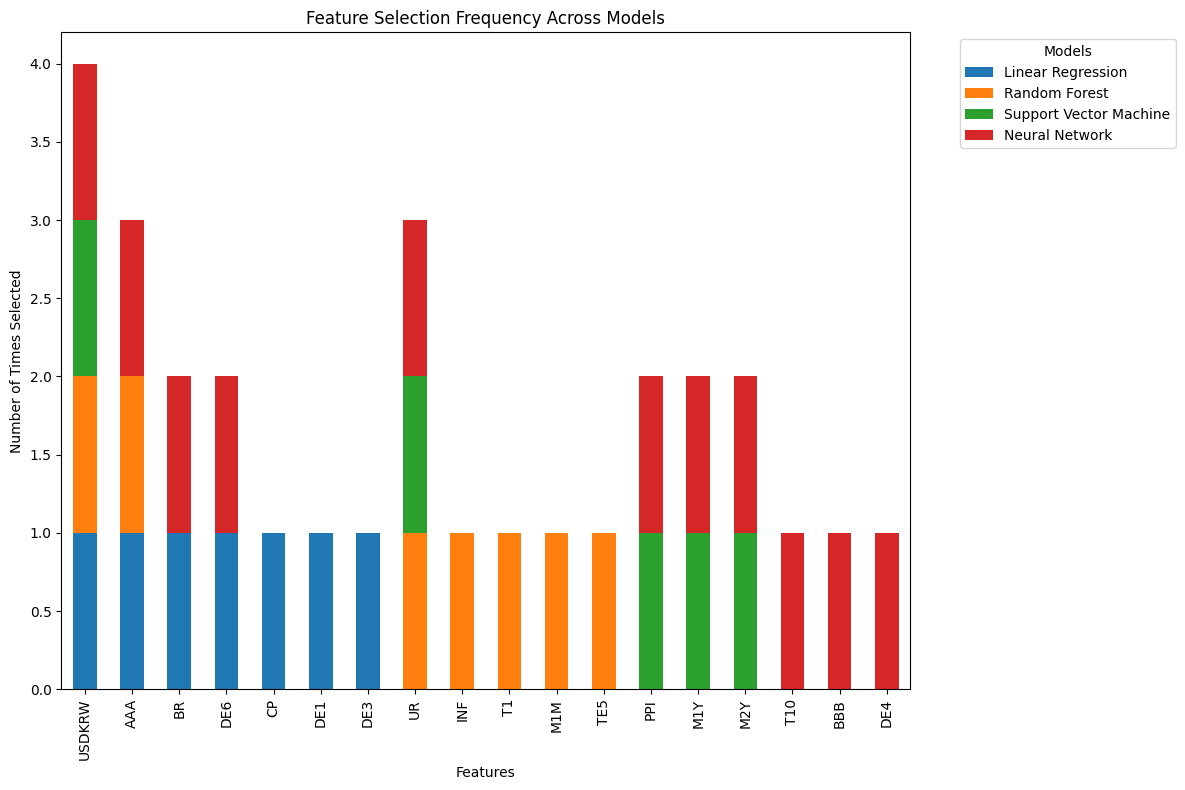

In [23]:
# 각 모델별로 선택된 특성의 횟수 계산
feature_counter = defaultdict(lambda: defaultdict(int))
for feature, model_list in important_features.items():
    for model in model_list:
        feature_counter[feature][model] += 1

# 데이터프레임으로 변환
feature_counts_df = pd.DataFrame(feature_counter).fillna(0).T

# 모델 이름 순서에 맞게 열 정렬
model_names = list(models.keys())
feature_counts_df = feature_counts_df[model_names]
feature_counts_df.sort_values(by=model_names, ascending=False, inplace=True)

# 시각화
feature_counts_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Features')
plt.ylabel('Number of Times Selected')
plt.title('Feature Selection Frequency Across Models')
plt.xticks(rotation=90)
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

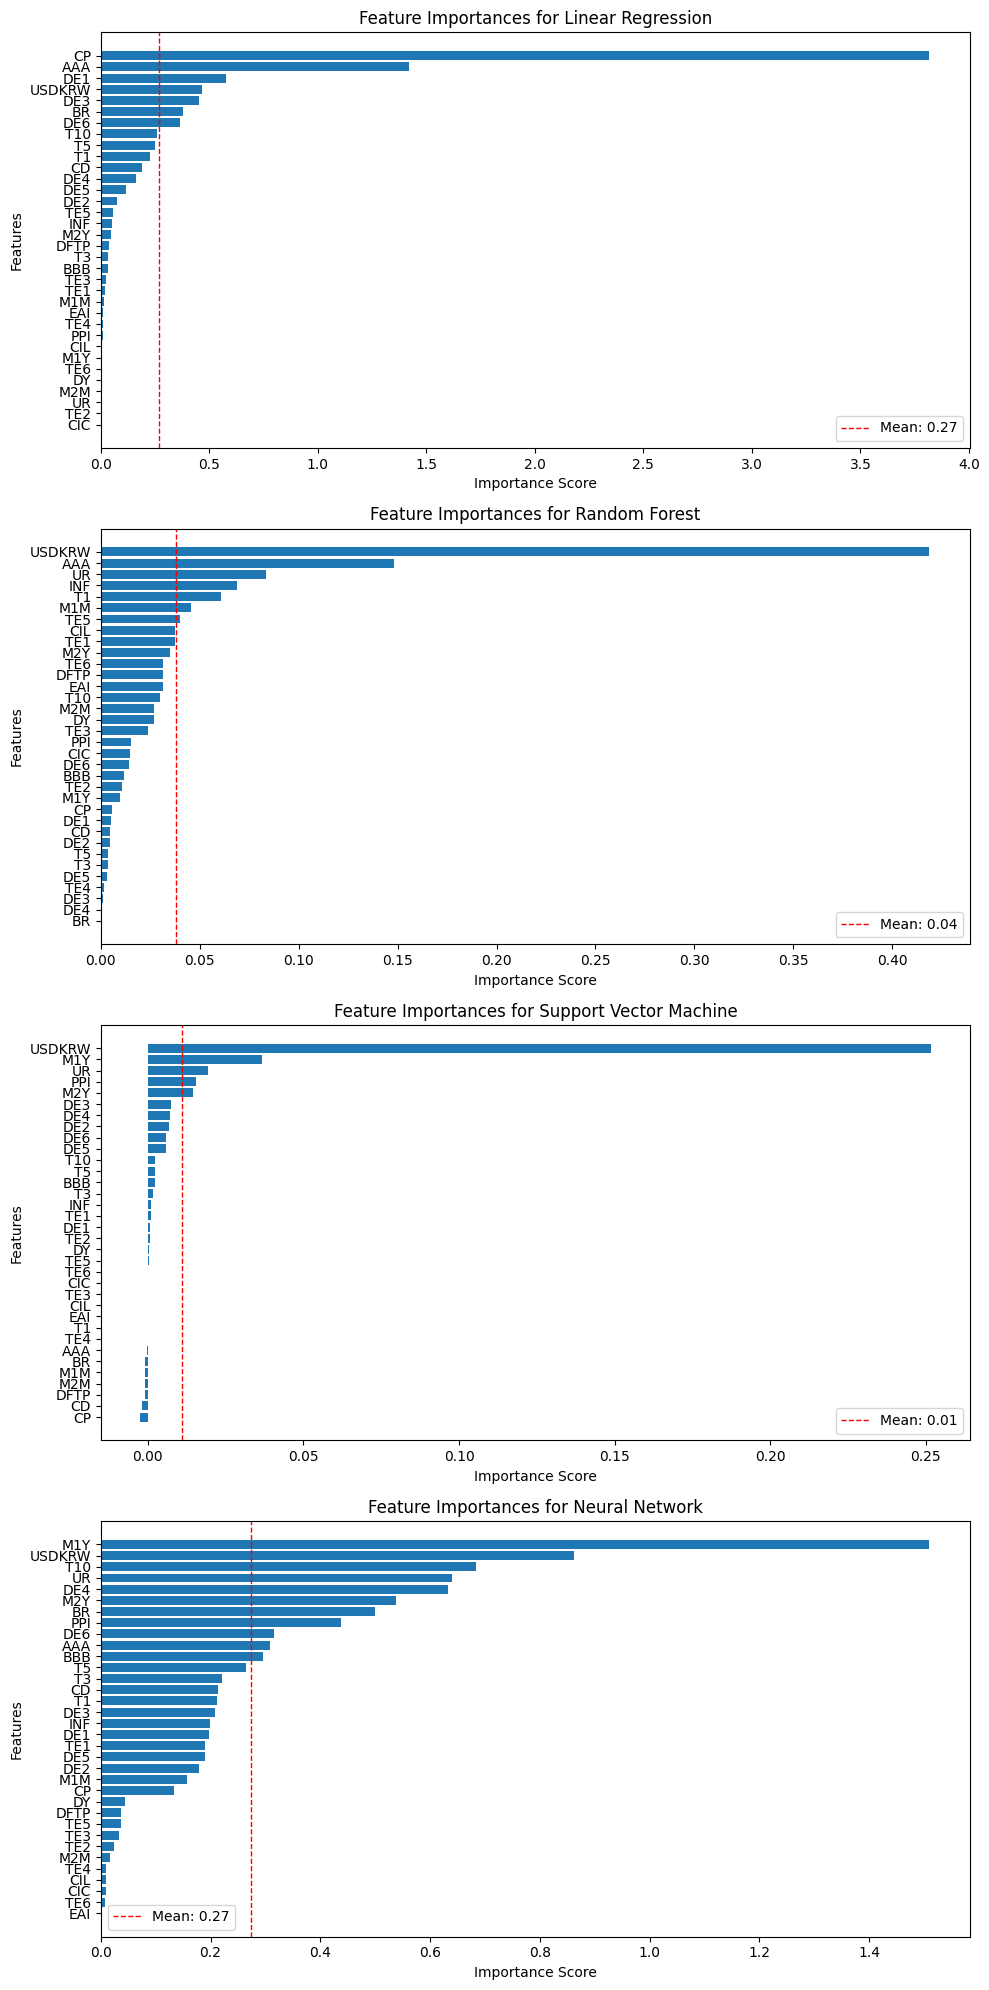

In [24]:
# 각 모델별 순열 특성 중요도 시각화
fig, axes = plt.subplots(len(models), 1, figsize=(10, len(models) * 5))
for ax, (model_name, importances) in zip(axes, feature_importances.items()):
    sorted_idx = np.argsort(importances)
    mean_importance = np.mean(importances)
    
    ax.barh(range(len(importances)), importances[sorted_idx], align='center')
    ax.axvline(x=mean_importance, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_importance:.2f}')
    ax.set_yticks(range(len(importances)))
    ax.set_yticklabels(np.array(X_train.columns)[sorted_idx])
    ax.set_title(f'Feature Importances for {model_name}')
    ax.set_xlabel('Importance Score')
    ax.set_ylabel('Features')
    ax.legend()

plt.tight_layout()
plt.show()

# 중요한 특성을 이용한 모델 재학습

In [25]:
# 각 모델의 중요한 특성들을 이용하여 모델을 재학습 및 평가
results_important = {}

for model_name, model in models.items():
    # 해당 모델의 중요한 특성 선택
    selected_features = important_features_df[model_name].dropna().tolist()
    
    # 중요한 특성만 포함하는 훈련 및 테스트 데이터 생성
    X_train_important = X_train[selected_features]
    X_test_important = X_test[selected_features]
    
    # 모델 학습
    model.fit(X_train_important, y_train)
    
    # 예측 및 평가
    y_pred = model.predict(X_test_important)
    results_important[model_name] = calculate_metrics(y_test, y_pred)

# 결과를 데이터프레임으로 변환하여 출력
results_important_df = pd.DataFrame(results_important).T
results_important_df

C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

,RMSE,MAE,MAPE,Correlation,Sign Accuracy,Directional Accuracy
Linear Regression,0.064247,0.051912,1.502009,0.195331,0.604167,0.723404
Random Forest,0.057096,0.047239,1.553567,0.415217,0.729167,0.723404
Support Vector Machine,0.062450,0.050318,1.235212,0.150615,0.604167,0.531915
Neural Network,0.180045,0.145450,4.637662,-0.354982,0.375000,0.531915


# 재학습한 모델 평가 및 순위 계산

In [26]:
# 각 지표에 대해 모델의 순위를 매기기
results_important_df['RMSE_rank'] = results_important_df['RMSE'].rank()
results_important_df['MAE_rank'] = results_important_df['MAE'].rank()
results_important_df['MAPE_rank'] = results_important_df['MAPE'].rank()
# results_important_df['Correlation_rank'] = results_important_df['Correlation'].rank(ascending=False)  # 상관관계는 클수록 좋음
# results_important_df['Sign Accuracy_rank'] = results_important_df['Sign Accuracy'].rank(ascending=False)  # 클수록 좋음
# results_important_df['Directional Accuracy_rank'] = results_important_df['Directional Accuracy'].rank(ascending=False)  # 클수록 좋음

# 각 지표의 순위를 합산하여 종합 순위 계산
results_important_df['Total_rank'] = results_important_df[['RMSE_rank', 'MAE_rank', 'MAPE_rank']].sum(axis=1)
# , 'Correlation_rank', 'Sign Accuracy_rank', 'Directional Accuracy_rank'

# 종합 순위가 가장 낮은 모델 선택
best_model_name = results_important_df['Total_rank'].idxmin()
best_model_metrics = results_important_df.loc[best_model_name]

# 최적의 모델 출력
print(f"The best model is: {best_model_name}")

The best model is: Random Forest


# 섹터별 지수 전처리

In [78]:
# KOSPI200 섹터별 지수 전처리
df_sector = pd.read_csv('Kospi200_indices_240429.csv')
# 'kospi200' 칼럼 삭제
del df_sector['kospi200']

# 'date' 칼럼을 datetime 형식으로 변환
df_sector['date'] = pd.to_datetime(df_sector['date'])

# 'date' 칼럼을 인덱스로 설정
df_sector.set_index('date', inplace=True)

# 월별 데이터로 리샘플링, 월말 값 사용
df_sector = df_sector.resample('M').last() #ME --> M

# 인덱스를 'YYYY/MM' 형식의 문자열로 변환
df_sector.index = df_sector.index.strftime('%Y-%m')

for column in df_sector.columns:
    df_sector[column] = df_sector[column].pct_change(fill_method=None) * 100

# 필요한 기간의 데이터만 선택
df_sector = df_sector.loc['2010-08':'2023-12']

# 칼럼명 변경
df_sector.columns = ['K_COM', 'K_CON', 'K_HV', 'K_MAT', 'K_ENG', 'K_IT', 'K_FIN', 'K_GOO', 'K_DIS', 'K_IND', 'K_HL']

sex = df_sector.copy()

# 결과 출력
df_sector

# 이걸 개별 종목으로 바꾼뒤에 똑같이 해보자.

,K_COM,K_CON,K_HV,K_MAT,K_ENG,K_IT,K_FIN,K_GOO,K_DIS,K_IND,K_HL
date,,,,,,,,,,,
2010-08,3.769020,1.008922,2.261856,3.293048,9.182252,-3.143340,-5.364339,-0.080515,-0.065942,1.349036,8.612430
2010-09,3.087502,14.852223,20.193361,11.493339,6.291353,2.995269,2.605205,4.998341,14.255730,13.384088,4.224523
2010-10,-0.113074,7.552895,3.959666,-6.289037,2.619079,-0.792122,-0.999323,-3.565221,6.494105,-4.337258,-8.397063
2010-11,0.534617,-1.051488,-0.993612,1.697290,5.466637,3.437733,2.307585,-1.089564,2.648659,2.251635,-3.687863
2010-12,0.456077,10.080805,12.518097,7.762252,7.001132,6.794362,13.961549,4.202755,3.298599,1.509451,8.555460
...,...,...,...,...,...,...,...,...,...,...,...
2023-08,-3.163497,-7.647904,-3.221083,-4.336248,-9.607737,-3.610401,2.703634,6.746299,0.291882,-2.989309,1.346091
2023-09,-3.639368,-7.320792,-8.834018,-4.274170,-6.696361,-4.445844,1.363382,-1.561149,0.281043,-5.607873,-0.832825
2023-10,-5.061984,-7.829978,-18.307355,-11.970356,-9.466785,-4.157326,-5.462172,-4.434017,-10.051336,-13.627582,-6.777677


In [90]:
file_path = ('kospi200_stocks.xlsx')
df = pd.read_excel(file_path, sheet_name=0, header=None) # 엑셀 파일 첫 번째 시트
data = df.iloc[14:].reset_index(drop=True) # 14번째 행부터 데이터프레임의 데이터를 가져오도록 설정
data.columns = df.iloc[8]  # 8번째 행을 컬럼명으로 설정
data = data.rename(columns={data.columns[0]: 'date'})  # 첫 번째 컬럼 이름을 'date'로 변경
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # 날짜 형식 변환
data = data.set_index(data.columns[0]) # 첫 번째 열을 인덱스로 설정하고 해당 열 제거
data.index = pd.to_datetime(data.index, errors='coerce') # 인덱스를 datetime 형식으로 변환

data.columns.name = 'Code'  # 종목 코드에 이름 설정
data.index.name = 'date'    # 날짜 인덱스에 이름 설정

# 10년치 데이터 사용
dataset_10year = data.loc['2010-01-01':'2023-12-31']
df_sector = dataset_10year.copy()
df_sector = df_sector.dropna(axis=1)

df_sector.head()

Code,A005930,A000660,A005380,A068270,A000270,A105560,A005490,A055550,A035420,A051910,...,A001430,A114090,A005250,A093370,A003030,A001680,A016380,A000670,A105630,A008730
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,15980,23150,121000,12845,20050,59700,618000,43200,60269,228500,...,16500,19650,8094,3663,30820,7950,1985495,569000,5314,9150
2010-01-02,15980,23150,121000,12845,20050,59700,618000,43200,60269,228500,...,16500,19650,8094,3663,30820,7950,1985495,569000,5314,9150
2010-01-03,15980,23150,121000,12845,20050,59700,618000,43200,60269,228500,...,16500,19650,8094,3663,30820,7950,1985495,569000,5314,9150
2010-01-04,16180,24100,119000,13359,20800,59400,612000,43600,60583,224000,...,16450,19750,8103,3639,29925,7820,1968597,569000,5562,8940
2010-01-05,16440,23350,110000,13530,19650,58700,618000,44600,60583,222500,...,16300,20750,8186,3615,30735,7760,1917903,550000,5967,8960


In [91]:
start_date = '2010-01-01'
end_date = '2023-12-31'
month_end = pd.date_range(start_date, end_date, freq='M')

df_sector = df_sector[df_sector.index.isin(month_end)] #.reset_index(drop=True)

# 인덱스를 object 타입으로 변환
df_sector.index = df_sector.index.astype(str)  # 인덱스를 문자열로 변환
df_sector.index = df_sector.index.str[:7]  # 인덱스에서 [7:] 해당하는 값 제거

df_sector = df_sector.pct_change(1).dropna()
df_sector = df_sector.loc['2010-08':'2023-12']
df_sector.head()

Code,A005930,A000660,A005380,A068270,A000270,A105560,A005490,A055550,A035420,A051910,...,A001430,A114090,A005250,A093370,A003030,A001680,A016380,A000670,A105630,A008730
date,,,,,,,,,,,,,,,,,,,,,
2010-08,-0.066667,-0.062222,-0.050336,0.072737,-0.003236,-0.056311,-0.011179,-0.053608,0.067939,0.048632,...,0.037736,-0.138593,0.073542,-0.040092,-0.017142,-0.184598,-0.047805,-0.001667,-0.168677,0.021111
2010-09,0.027778,0.049763,0.081272,0.082339,0.194805,0.008230,0.060637,-0.049020,-0.002545,-0.033333,...,0.290909,0.106436,0.251420,0.231445,0.127023,0.163889,0.055328,0.148581,0.031216,0.058760
2010-10,-0.041184,0.045147,0.111111,0.114060,0.220109,0.020408,-0.104651,-0.002291,0.017863,0.040480,...,0.033451,0.024609,0.030443,-0.078635,0.116025,-0.013126,-0.047573,-0.047965,0.064165,-0.038027
2010-11,0.108725,0.015119,0.014706,0.299221,0.090200,0.082000,-0.016234,0.026406,-0.017549,0.118156,...,0.141397,-0.117904,-0.004221,-0.199531,-0.040600,-0.044740,-0.006116,0.236641,-0.075321,-0.010684
2010-12,0.148910,0.021277,0.005797,0.035557,0.033708,0.109057,0.071507,0.183445,0.158163,0.007732,...,0.101493,0.022277,-0.012715,0.061804,0.071225,-0.022785,0.022564,0.058025,0.082972,-0.049676


In [94]:
# 서로 다른 값 찾기
diff_df_sector = df_sector.index.difference(sex.index)
diff_sex = sex.index.difference(df_sector.index)

# 결과 출력
print("df_sector.index에만 있는 값들:")
print(diff_df_sector)
print("\nsex.index에만 있는 값들:")
print(diff_sex)

df_sector.index에만 있는 값들:
Index([], dtype='object', name='date')

sex.index에만 있는 값들:
Index([], dtype='object', name='date')


In [95]:
# RF 모델의 중요한 특성을 사용하여 데이터 준비
RF_important_features = important_features_df[best_model_name].dropna().tolist()
X_RF = df_factor[RF_important_features].loc['2010-08':'2023-12']

results_sector = {}
important_features_sector = {}

for target in df_sector.columns:
    # 데이터의 총 개수 계산
    n = len(X_RF)
    
    # 훈련 데이터의 크기 계산 (80%)
    train_size = int(n * 0.8)
    
    # 훈련 세트와 테스트 세트로 분할
    X_train_RF = X_RF[:train_size]
    X_test_RF = X_RF[train_size:]
    y_train = df_sector[target][:train_size]
    y_test = df_sector[target][train_size:]

    # RF 모델 학습 및 평가
    RF_model = models[best_model_name]
    RF_model.fit(X_train_RF, y_train)
    y_pred = RF_model.predict(X_test_RF)
    results_RF = calculate_metrics(y_test, y_pred)
    
    # 결과 저장
    results_sector[target] = results_RF
    
    # 순열 중요도 계산
    result = permutation_importance(RF_model, X_test_RF, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    important_features_sector[target] = result.importances_mean

# 결과를 데이터프레임으로 변환하여 출력
results_all_df = pd.DataFrame(results_sector).T
results_all_df

C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

,RMSE,MAE,MAPE,Correlation,Sign Accuracy,Directional Accuracy
A005930,0.065204,0.053545,inf,0.295057,0.515152,0.59375
A000660,0.098013,0.079633,inf,0.273952,0.454545,0.56250
A005380,0.084057,0.068086,inf,0.028500,0.515152,0.53125
A068270,0.147041,0.122295,5.628016,0.187503,0.575758,0.59375
A000270,0.096893,0.078961,2.035109,-0.057330,0.515152,0.53125
...,...,...,...,...,...,...
A001680,0.114402,0.100265,3.842118,-0.022284,0.515152,0.43750
A016380,0.285582,0.162018,2.150033,-0.179142,0.515152,0.56250
A000670,0.135828,0.103497,3.303700,-0.030269,0.424242,0.56250
A105630,0.140844,0.113422,inf,0.128422,0.484848,0.56250


In [96]:
# 중요도를 데이터프레임으로 변환하여 출력
importance_df = pd.DataFrame(important_features_sector, index=RF_important_features)

importance_df

,A005930,A000660,A005380,A068270,A000270,A105560,A005490,A055550,A035420,A051910,...,A001430,A114090,A005250,A093370,A003030,A001680,A016380,A000670,A105630,A008730
INF,0.042941,0.031047,-0.026088,0.026872,0.042278,0.000995,-0.002101,0.020337,0.103709,0.002805,...,-0.057858,-0.009886,0.000824,-0.125570,-0.030444,-0.105918,0.011378,0.031390,0.003001,-0.003199
T1,0.012221,-0.181465,0.038612,0.079092,0.116585,-0.060367,-0.030402,-0.089416,0.139089,-0.049294,...,0.117528,0.015015,0.023824,-0.114025,-0.003886,-0.678154,-0.050877,-0.157509,0.012927,0.049629
AAA,-0.108651,-0.029044,0.074110,-0.005523,0.105216,0.019231,0.033177,-0.002437,-0.024899,-0.022397,...,-0.066853,0.028531,0.066833,0.073559,0.034020,-0.290930,-0.014911,-0.124985,0.052973,-0.021423
UR,-0.057687,0.044263,0.057708,-0.043883,-0.003330,-0.001331,-0.046281,0.004841,0.014243,0.101287,...,-0.024210,-0.020973,-0.201537,-0.048808,0.050223,-0.502487,0.004211,-0.051739,-0.014022,0.021641
USDKRW,0.219659,0.695311,0.136737,-0.016127,-0.108595,0.430615,0.371627,0.330676,-0.052623,0.409753,...,0.066644,0.013739,0.517272,0.165849,0.008843,0.132287,-0.050388,-0.015068,-0.048505,0.157636
M1M,0.005251,-0.114689,0.168293,0.055253,0.236706,-0.002076,0.001508,0.040184,0.047403,-0.026240,...,0.027272,-0.014274,0.085791,0.169631,0.096500,-0.310055,0.024927,-0.306661,0.523293,-0.006971
TE5,0.100184,0.201239,-0.037645,0.164443,0.054948,0.031292,-0.002550,0.116432,0.063096,0.031021,...,0.001637,-0.073620,0.079950,0.102074,0.287230,-0.218901,-0.044230,-0.038002,0.122677,0.092192


In [97]:
# 중요도 순위 매기기
importance_rank_df = importance_df.rank(ascending=False)
importance_rank_df['Average Rank'] = importance_rank_df.mean(axis=1)

# 평균 순위로 정렬하여 높은 순으로 나열
importance_rank_df.sort_values('Average Rank', inplace=True)

# 정렬된 중요 특성 리스트
sorted_features = importance_rank_df.index.tolist()

# 높은 순으로 정렬된 중요도 순위 출력
print("Sorted important features across all columns (high to low):")
sorted_features

Sorted important features across all columns (high to low):


['USDKRW', 'TE5', 'INF', 'T1', 'M1M', 'UR', 'AAA']

           USDKRW   TE5       INF     T1       M1M         UR    AAA
2010-08  0.160040  0.38  2.681788  3.130  1.314028   8.571429  4.680
2010-09 -3.960979  0.41  3.407571  2.990  1.127549  -7.894737  4.410
2010-10 -1.348511  0.41  3.682555  2.800  0.506332   8.571429  4.130
2010-11  2.725013  0.23  2.988718  2.920  0.613347  -2.631579  4.190
2010-12 -1.589908  0.30  3.033703  2.870  0.672990 -10.810811  4.170
...           ...   ...       ...    ...       ...        ...    ...
2023-08  3.234375  0.20  3.360029  3.496 -0.167621   7.692308  4.500
2023-09  1.770849  0.26  3.684984  3.610  0.663556 -10.714286  4.602
2023-10  0.594884  0.32  3.755955  3.741 -0.192148   4.000000  4.827
2023-11 -4.716144  0.33  3.300633  3.722 -0.075191  -3.846154  4.583
2023-12  0.031032  0.33  3.157606  3.516  0.891538  12.000000  4.076

[161 rows x 7 columns]


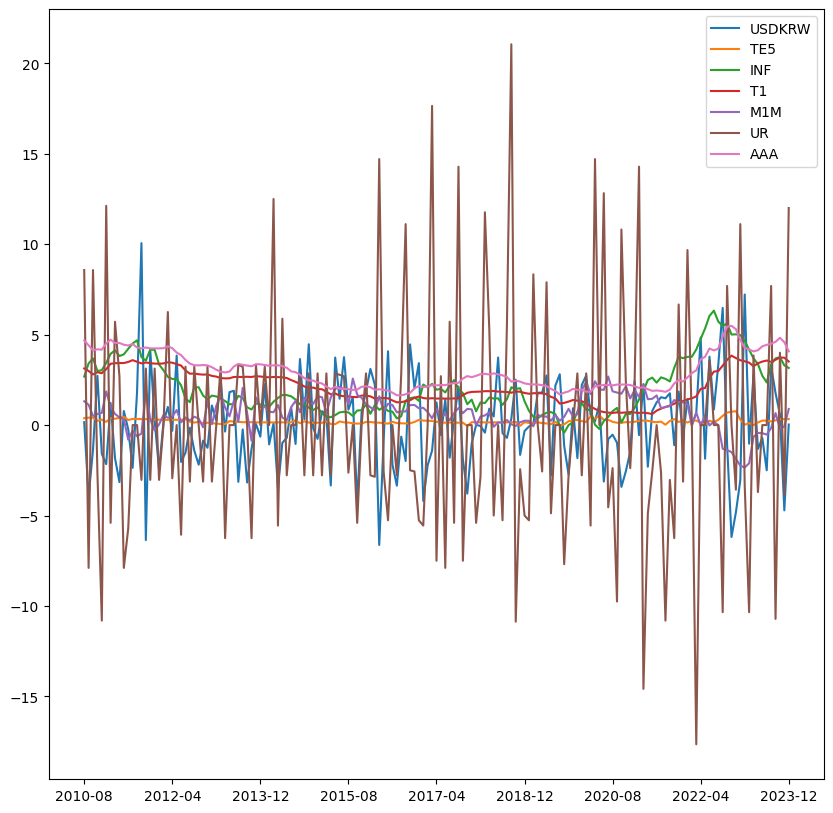

In [98]:
# 위의 경제지표들을 시각화해보자.
df_factor[sorted_features].loc['2010-08':'2023-12'].plot(figsize=(10, 10))
print(df_factor[sorted_features].loc['2010-08':'2023-12'])

C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

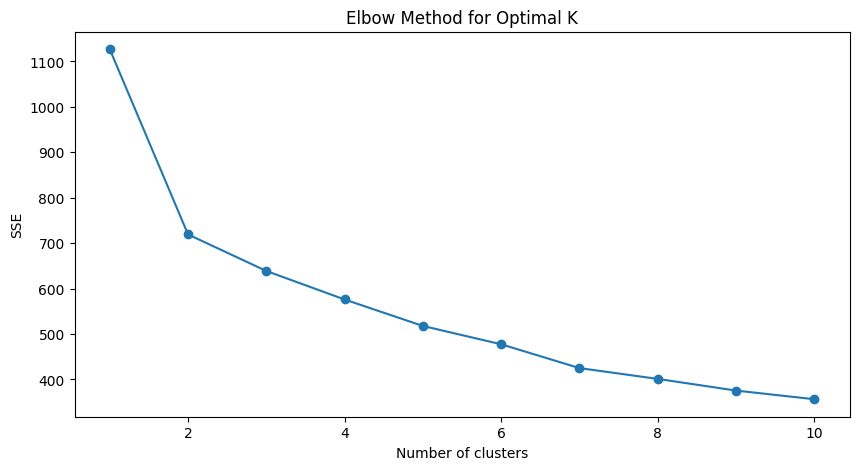

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_factor[sorted_features].loc['2010-08':'2023-12'])

df = df_factor[sorted_features].loc['2010-08':'2023-12'].copy()

# 엘보우 방법을 사용한 K 값 선택
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [100]:
import matplotlib.dates as mdates
# K-평균 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# 클러스터 중심값 확인
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, center in enumerate(cluster_centers):
    print(f'클러스터 {i}: 중심값 = {center}')

클러스터 0: 중심값 = [-0.58065813  0.15288462  1.58879225  2.12707692  0.81108258  4.49417353
  2.86409615]
클러스터 1: 중심값 = [ 0.23787547  0.31761905  3.90858274  3.34304762 -0.11431804 -0.38880124
  4.40657143]
클러스터 2: 중심값 = [ 0.50096092  0.16895522  1.20960566  1.41489552  1.11392207 -3.11652715
  2.15579104]


C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


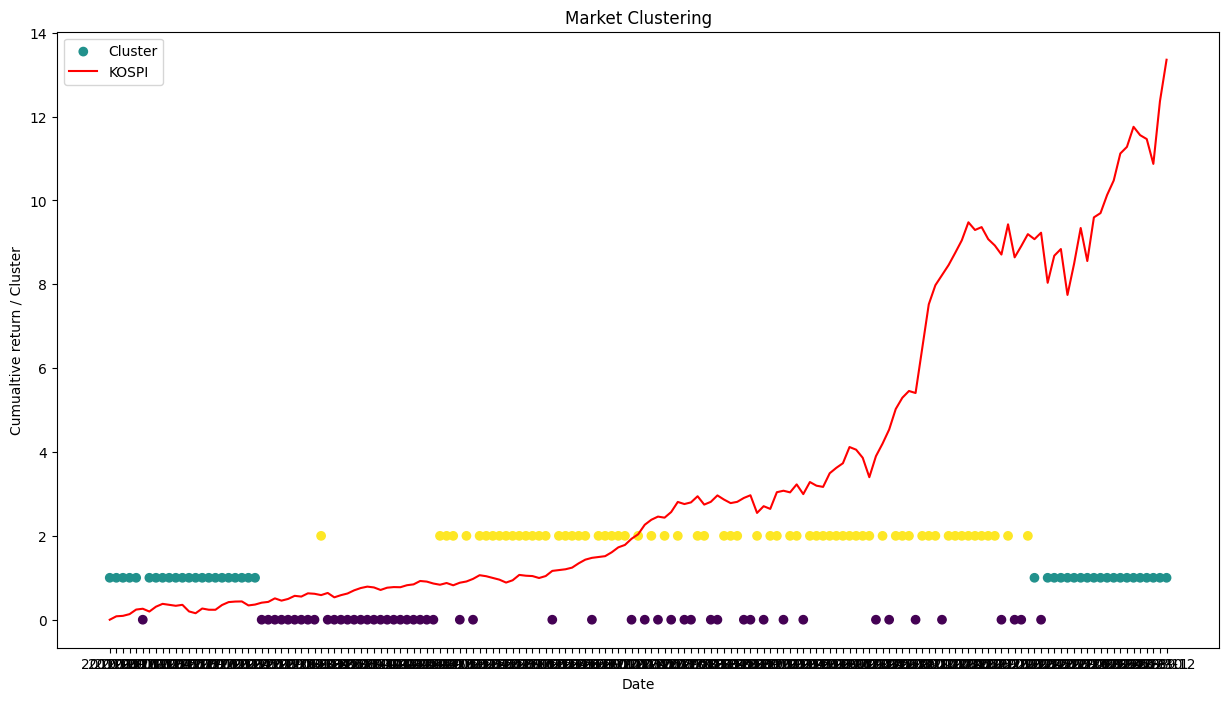

In [101]:
# 클러스터 결과 시각화
plt.figure(figsize=(15, 8))

# 클러스터 결과 시각화
plt.scatter(df.index, df['Cluster'], c=df['Cluster'], cmap='viridis', label='Cluster')
ks_cum = (1+df_KOSPI['p(t)'].loc['2010-08':'2023-12']).cumprod()-1
plt.plot(df_KOSPI.loc['2010-08':'2023-12'].index, ks_cum, color='red', label='KOSPI')

plt.title('Market Clustering')
plt.xlabel('Date')
plt.ylabel('Cumualtive return / Cluster')
plt.legend()

plt.show()

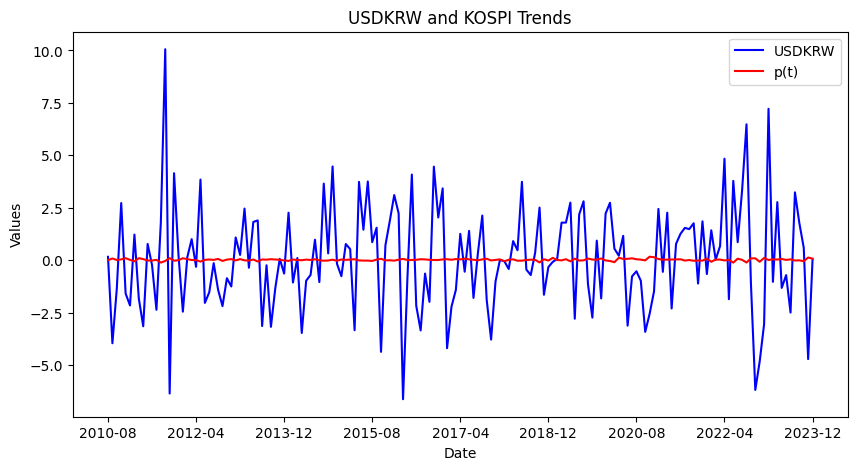

In [102]:
#시각화
fig, ax = plt.subplots(figsize=(10, 5))

# 두 데이터를 하나의 그래프에 시각화
df_factor['USDKRW'].loc['2010-08':'2023-12'].plot(ax=ax, label='USDKRW', color='blue')
df_KOSPI.loc['2010-08':'2023-12'].plot(ax=ax, label='KOSPI', color='red')

# 그래프 설정
plt.title('USDKRW and KOSPI Trends')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

plt.show()


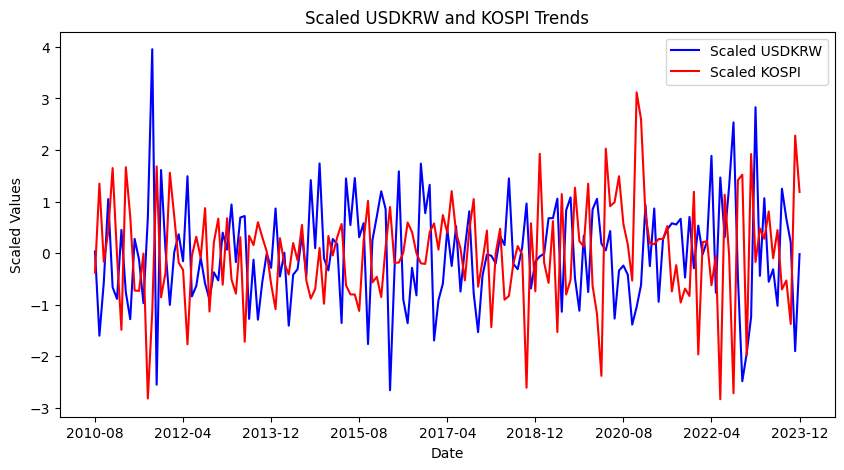

In [103]:
from sklearn.preprocessing import StandardScaler

# 데이터를 스케일링합니다.
scaler = StandardScaler()
scaled_USDKRW = scaler.fit_transform(df_factor['USDKRW'].loc['2010-08':'2023-12'].values.reshape(-1, 1))
scaled_KOSPI = scaler.fit_transform(df_KOSPI.loc['2010-08':'2023-12'].values.reshape(-1, 1))

# 새로운 DataFrame에 스케일링된 데이터를 추가합니다.
df_scaled = pd.DataFrame(index=df_factor['USDKRW'].loc['2010-08':'2023-12'].index)
df_scaled['Scaled_USDKRW'] = scaled_USDKRW
df_scaled['Scaled_KOSPI'] = scaled_KOSPI

# 스케일링된 데이터를 시각화합니다.
plt.figure(figsize=(10, 5))
df_scaled['Scaled_USDKRW'].plot(label='Scaled USDKRW', color='blue')
df_scaled['Scaled_KOSPI'].plot(label='Scaled KOSPI', color='red')

# 그래프 설정
plt.title('Scaled USDKRW and KOSPI Trends')
plt.xlabel('Date')
plt.ylabel('Scaled Values')
plt.legend()

plt.show()


<Axes: >

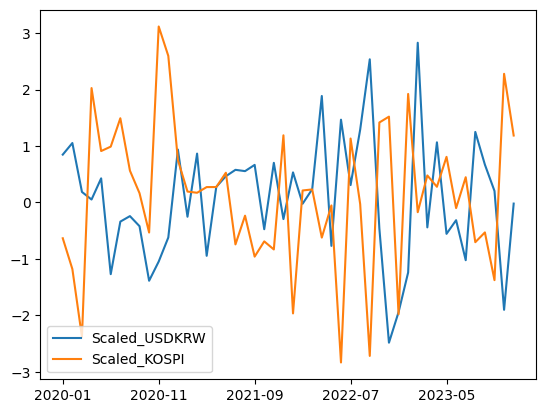

In [104]:
df_scaled.loc['2020-01':'2023-12'].plot() #코스피 지수가 환율을 선행하는데?

# 포트폴리오 구성

In [105]:
from scipy.optimize import minimize

df_sector_portfolio = df_sector.loc['2019-01':'2023-12']

# 기대 수익률과 공분산 행렬 계산
mean_returns = df_sector_portfolio.mean()
cov_matrix = df_sector_portfolio.cov()

df_sector_portfolio

Code,A005930,A000660,A005380,A068270,A000270,A105560,A005490,A055550,A035420,A051910,...,A001430,A114090,A005250,A093370,A003030,A001680,A016380,A000670,A105630,A008730
date,,,,,,,,,,,,,,,,,,,,,
2019-01,0.192506,0.221488,0.092827,-0.015732,0.078635,0.033333,0.127572,0.090909,0.114754,0.060519,...,0.002825,0.034137,-0.047809,0.113150,0.064909,0.005988,0.453271,0.030872,0.030227,0.158915
2019-02,-0.022752,-0.052774,-0.023166,-0.066213,0.005502,-0.077003,-0.040146,0.010417,-0.022059,0.061141,...,0.087324,-0.083495,0.094142,-0.013264,0.003810,0.097222,0.087878,0.028646,0.180929,-0.100334
2019-03,-0.009978,0.060000,-0.055336,-0.114912,-0.032832,-0.056370,-0.038023,-0.037801,-0.067669,-0.062740,...,-0.007772,-0.040254,-0.078394,-0.084673,-0.009488,0.025316,-0.203943,0.012658,0.180124,-0.037175
2019-04,0.026876,0.064690,0.158996,0.171269,0.280057,0.103943,0.007905,0.050000,-0.036290,-0.013661,...,0.026110,0.026490,0.010373,0.075075,0.072797,-0.063492,0.250028,-0.031250,0.015789,0.100386
2019-05,-0.073064,-0.173418,-0.028881,-0.103772,-0.130387,-0.051948,-0.068627,0.007937,-0.066946,-0.077562,...,-0.127226,-0.135484,-0.121150,-0.103536,-0.044643,-0.058380,-0.171295,-0.091613,-0.227979,-0.080702
2019-06,0.105882,0.064319,0.040892,0.081578,0.118170,0.046804,0.029474,0.010124,0.022422,0.064565,...,0.072886,0.019900,0.014019,-0.055682,0.069159,-0.030000,-0.185197,0.022727,-0.062640,0.049618
2019-07,-0.035106,0.106475,-0.096429,-0.170314,-0.005682,-0.053435,-0.077710,-0.031180,0.210526,-0.047955,...,-0.119565,-0.095122,-0.096774,0.307948,-0.092657,-0.016495,-0.033696,-0.059722,-0.100239,0.145455
2019-08,-0.029768,0.006502,0.015810,-0.079181,-0.001143,-0.085253,-0.064302,-0.063218,0.061594,-0.020741,...,-0.003086,0.040431,-0.056122,0.024674,-0.026975,-0.090147,-0.089543,-0.168390,-0.061008,-0.057143
2019-09,0.114773,0.062016,0.042802,0.044590,0.043478,0.075567,0.075829,0.025767,0.071672,-0.093797,...,0.015480,0.069948,0.127027,-0.068077,0.011881,0.025346,-0.477500,0.079929,0.090395,-0.043771


In [106]:
# 1. 평균-분산 최적화 모형
def mean_variance_portfolio(mean_returns, cov_matrix, target_return):
    """
    평균-분산 최적화 모형을 사용하여 주어진 목표 수익률을 달성하는 포트폴리오의 비중을 계산합니다.
    
    Parameters:
    mean_returns (array): 자산의 기대 수익률
    cov_matrix (array): 자산 수익률의 공분산 행렬
    target_return (float): 목표 수익률
    
    Returns:
    array: 최적화된 포트폴리오 비중
    """
    num_assets = len(mean_returns)
    
    # 포트폴리오 분산 계산 함수
    def portfolio_variance(weights, cov_matrix):
        return weights.T @ cov_matrix @ weights

    # 포트폴리오 수익률 계산 함수
    def portfolio_return(weights, mean_returns):
        return weights.T @ mean_returns

    # 제약 조건: 비중의 합은 1이어야 함
    def constraint_sum_of_weights(weights):
        return np.sum(weights) - 1

    # 제약 조건: 포트폴리오 수익률은 목표 수익률 이상이어야 함
    def constraint_min_return(weights, mean_returns, target_return):
        return portfolio_return(weights, mean_returns) - target_return

    # 초기값 설정 (균등하게 분배)
    init_guess = np.array([1.0 / num_assets] * num_assets)

    # 제약 조건을 딕셔너리 형태로 정의
    constraints = (
        {'type': 'eq', 'fun': constraint_sum_of_weights},
        {'type': 'ineq', 'fun': lambda weights: constraint_min_return(weights, mean_returns, target_return)}
    )

    # 경계 조건 설정 (각 비중은 0 이상)
    bounds = tuple((0, 1) for _ in range(num_assets))

    # 최적화 실행
    optimal_portfolio = minimize(
        portfolio_variance,
        init_guess,
        args=(cov_matrix,),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )

    return optimal_portfolio.x * 100

In [107]:
# 2. 최소 분산 모형
def minimum_variance_portfolio(cov_matrix):
    """
    최소 분산 모형을 사용하여 포트폴리오의 최소 분산을 달성하는 비중을 계산합니다.
    
    Parameters:
    cov_matrix (array): 자산 수익률의 공분산 행렬
    
    Returns:
    array: 최적화된 포트폴리오 비중
    """
    num_assets = len(cov_matrix)
    
    # 목적 함수: 포트폴리오 분산
    def objective(weights, cov_matrix):
        return np.dot(weights.T, np.dot(cov_matrix, weights))

    # 제약 조건: 비중의 합은 1이어야 함
    constraints = ({
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    })
    
    # 경계 조건 설정 (각 비중은 0 이상)
    bounds = tuple((0, 1) for _ in range(num_assets))
    
    # 초기값 설정 (균등하게 분배)
    init_guess = np.array(num_assets * [1. / num_assets])
    
    # 최적화 실행
    optimal_portfolio = minimize(objective, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    
    return optimal_portfolio.x * 100

In [108]:
# 3. 위험 동등 모형
def risk_parity_portfolio(cov_matrix):
    """
    위험 동등 모형을 사용하여 각 자산이 포트폴리오의 총 위험에 동일하게 기여하도록 하는 비중을 계산합니다.
    
    Parameters:
    cov_matrix (array): 자산 수익률의 공분산 행렬
    
    Returns:
    array: 최적화된 포트폴리오 비중
    """
    num_assets = len(cov_matrix)
    
    # 포트폴리오 분산 계산 함수
    def portfolio_variance(weights, cov_matrix):
        return np.dot(weights.T, np.dot(cov_matrix, weights))

    # 한계 위험 기여도 계산 함수
    def marginal_risk_contribution(weights, cov_matrix):
        return np.dot(cov_matrix, weights)

    # 위험 기여도 계산 함수
    def risk_contribution(weights, cov_matrix):
        portfolio_variance_value = portfolio_variance(weights, cov_matrix)
        mrc = marginal_risk_contribution(weights, cov_matrix)
        return weights * mrc, portfolio_variance_value

    # 목적 함수: 각 자산의 위험 기여도의 차이를 최소화
    def objective(weights, cov_matrix):
        rc, portfolio_variance_value = risk_contribution(weights, cov_matrix)
        target_rc = portfolio_variance_value / num_assets
        return np.sum((rc - target_rc)**2)

    # 제약 조건: 비중의 합은 1이어야 함
    constraints = ({
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    })
    
    # 경계 조건 설정 (각 비중은 0 이상)
    bounds = tuple((0, 1) for _ in range(num_assets))
    
    # 초기값 설정 (균등하게 분배)
    init_guess = np.array(num_assets * [1. / num_assets])
    
    # 최적화 실행
    optimal_portfolio = minimize(objective, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    
    return optimal_portfolio.x * 100

In [109]:
# 4. 동일 비중 모형
def equal_weighting_portfolio(num_assets):
    """
    동일 비중 모형을 사용하여 각 자산에 동일한 비중을 부여합니다.
    
    Parameters:
    num_assets (int): 자산의 수
    
    Returns:
    array: 동일 비중 포트폴리오 비중
    """
    return np.array(num_assets * [1. / num_assets]) * 100

In [110]:
# 포트폴리오 구성
target_returns = [0.05, 0.07, 0.10]

portfolio_weights = pd.DataFrame(index = df_sector_portfolio.columns)

for target in target_returns:
    weights = mean_variance_portfolio(mean_returns, cov_matrix, target)
    column_name = f'Mean-Variance {target*100:.2f}%'
    portfolio_weights[column_name] = weights

# 최소 분산 모형
min_variance_weights = minimum_variance_portfolio(cov_matrix)
portfolio_weights['Minimum Variance'] = min_variance_weights

# 위험 동등 모형
risk_parity_weights = risk_parity_portfolio(cov_matrix)
portfolio_weights['Risk Parity'] = risk_parity_weights

# 동일 비중 모형
equal_weight_weights = equal_weighting_portfolio(len(mean_returns))
portfolio_weights['Equal Weighting'] = equal_weight_weights

# 데이터프레임 전체를 소수점 두 자리로 반올림
portfolio_weights = portfolio_weights.round(2)
portfolio_weights.T

Code,A005930,A000660,A005380,A068270,A000270,A105560,A005490,A055550,A035420,A051910,...,A001430,A114090,A005250,A093370,A003030,A001680,A016380,A000670,A105630,A008730
Mean-Variance 5.00%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,7.50,0.00,0.00,0.00,0.00,0.00
Mean-Variance 7.00%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Mean-Variance 10.00%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Minimum Variance,0.00,0.00,0.00,3.98,0.00,0.00,0.00,0.00,1.37,0.00,...,0.00,0.00,0.00,3.21,0.00,0.00,0.00,0.00,0.00,0.00
Risk Parity,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,...,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71
Equal Weighting,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,...,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71


# 시나리오 구성

## 사례 1 (코로나19 이후 금리 및 물가 상승 기간(2020년 1월 ~ 2022년 3월, 2년 3개월))

In [118]:
df_factor_scenario_1 = df_factor[sorted_features].loc['2020-01':'2022-03']
df_factor_scenario_1

,USDKRW,TE5,INF,T1,M1M,UR,AAA
2020-01,2.219727,0.22,1.219611,1.316,1.939402,-2.777778,1.955
2020-02,2.737643,0.17,0.854890,1.214,2.378765,2.857143,1.847
2020-03,0.551032,0.48,0.826263,1.030,1.712470,-5.555556,1.840
2020-04,0.212662,0.35,0.019099,0.893,2.423599,14.705882,2.145
2020-05,1.158994,0.52,-0.212740,0.779,1.978251,0.000000,2.179
2020-06,-3.122479,0.29,0.220120,0.719,1.941153,12.820513,2.218
2020-07,-0.774548,0.29,0.446631,0.689,2.685843,-4.545455,2.219
2020-08,-0.528790,0.18,0.769424,0.671,1.864602,-2.380952,2.192
2020-09,-0.978820,0.13,0.947953,0.705,1.798495,-9.756098,2.239
2020-10,-3.417128,0.13,0.138943,0.680,1.732844,10.810811,2.239


In [119]:
def create_scenarios(df):
    normal = df.mean()
    percentile_20 = df.quantile(0.25)
    percentile_80 = df.quantile(0.75)
    
    scenarios = pd.DataFrame({
        'Normal': normal,
        'Weak': percentile_80,
        'Robust': percentile_20
    })
    
    return scenarios
df_scenarios_1 = create_scenarios(df_factor_scenario_1)
df_scenarios_1

,Normal,Weak,Robust
USDKRW,0.180676,1.510717,-0.876684
TE5,0.228519,0.260000,0.165000
INF,1.783960,2.632233,0.691073
T1,0.946000,1.196000,0.692000
M1M,1.592969,1.940277,1.259925
UR,-0.600549,2.648084,-4.711752
AAA,2.186037,2.243000,1.954000


In [120]:
def mahalanobis_distance(instance, data):
    """
    마할라노비스 거리를 계산하는 함수

    Parameters:
    instance (array): 시나리오를 구성하는 경제변수 값
    data (array): 경제변수의 역사적 데이터

    Returns:
    float: 마할라노비스 거리
    """
    mean = np.mean(data, axis=0)
    cov_matrix = np.cov(data, rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    diff = instance - mean
    distance = np.dot(np.dot(diff.T, inv_cov_matrix), diff)
    return distance

In [121]:
def calculate_probabilities(distances):
    """
    마할라노비스 거리를 기반으로 시나리오 발생 가능성을 계산하는 함수

    Parameters:
    distances (list): 각 시나리오의 마할라노비스 거리

    Returns:
    list: 각 시나리오의 발생 가능성
    """
    exp_distances = [np.exp(-d / 2) for d in distances]
    total = sum(exp_distances)
    probabilities = [d * 100 / total for d in exp_distances]
    return probabilities

In [122]:
# 마할라노비스 거리 계산
normal_distance = mahalanobis_distance(df_scenarios_1['Normal'].values, X_RF[sorted_features].values)
weak_distance = mahalanobis_distance(df_scenarios_1['Weak'].values, X_RF[sorted_features].values)
robust_distance = mahalanobis_distance(df_scenarios_1['Robust'].values, X_RF[sorted_features].values)

# 거리 및 확률 계산
distances = [normal_distance, weak_distance, robust_distance]
probabilities = calculate_probabilities(distances)

# 마할라노비스 거리 및 발생 확률 열 추가
df_scenarios_1.loc['Mahalanobis Distance'] = distances
df_scenarios_1.loc['Probability'] = probabilities

In [123]:
df_scenarios_1

,Normal,Weak,Robust
USDKRW,0.180676,1.510717,-0.876684
TE5,0.228519,0.260000,0.165000
INF,1.783960,2.632233,0.691073
T1,0.946000,1.196000,0.692000
M1M,1.592969,1.940277,1.259925
UR,-0.600549,2.648084,-4.711752
AAA,2.186037,2.243000,1.954000
Mahalanobis Distance,3.161453,5.976994,6.070754
Probability,67.651204,16.553456,15.795340


In [ ]:
#알겠다.

#아래 진행과정이 맞긴 맞다.
# 지금 시나리오 1에서 INF가 얼마나 상승할지를 알아냈으니,
# 이 숫자를 대입하면 되는거다.

#X에 factor를 집어넣고, 시나리오에서의 바뀐 숫자만 따로 수작업으로 넣어주고
#Y에 코스피 대신, 나의 포트폴리오를 집어넣으면
#위에 함수로 포트폴리오 다 만들어 놨으니, 포트폴리오 만들 수 있잖아!

#되는거 아닌가?

# 시나리오 기반 포트폴리오 평가  단계

In [126]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data for training
# X = df_factor.drop(columns=['KOSPI200'])
# 여기 코드 때문에 마지막 셀에 문제 생김. df_factor에 KOSPI200셀을 넣자(df_KOSPI데이터프레임 정보를 여기 넣자.). 그리고 주석처리된 코드로 x, y를 설정하자.
X = df_factor
# y = df_factor['KOSPI200']
y = df_KOSPI
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print('Random Forest RMSE:', mean_squared_error(y_test, rf_pred, squared=False))

# Train Neural Network Model
nn_model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
print('Neural Network RMSE:', mean_squared_error(y_test, nn_pred, squared=False))

# Train Support Vector Machine Model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print('SVM RMSE:', mean_squared_error(y_test, svm_pred, squared=False))

C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

Random Forest RMSE: 0.05090988264885468
Neural Network RMSE: 0.22430685130508476
SVM RMSE: 0.047869771771774476


C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

In [127]:
from scipy.spatial.distance import mahalanobis


# Define the Mahalanobis distance-based scenario generation
def generate_scenarios(df, base_scenario, num_scenarios=5):
    cov_matrix = np.cov(df.values.T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    
    scenarios = []
    for i in range(num_scenarios):
        scenario = base_scenario + np.random.multivariate_normal(mean=np.zeros(df.shape[1]), cov=cov_matrix)
        distance = mahalanobis(scenario, base_scenario, inv_cov_matrix)
        scenarios.append((scenario, distance))
        
    return scenarios

# Define a base scenario and generate new scenarios
base_scenario = X.mean().values
scenarios = generate_scenarios(X, base_scenario, num_scenarios=5)

# Display scenarios and their distances
for i, (scenario, dist) in enumerate(scenarios):
    print(f"Scenario {i+1}: Distance {dist:.2f}, Values: {scenario}")


Scenario 1: Distance 3.94, Values: [ 2.85957906  2.37081954  2.28675689  2.80734304  3.59531246  2.72942134
  2.65655591  2.57632515  2.60579548  4.31235951  9.10059944  0.78676806
  1.72401957 -0.24868294 -0.42053394 -0.10088426  1.76396444  9.89106396
 13.39759856  0.03450593  0.74867515  1.70656389  0.23497606 -0.1236257
 -0.05076023  0.02947035  0.4365234  -0.35860184  4.78824005  6.49480357
  6.52427406  6.44404358  6.37117795  6.72977976]
Scenario 2: Distance nan, Values: [ 3.49617512  2.88955919  1.88026633  3.05948574  3.09802432  3.03077089
  3.19370944  3.2839757   3.51342997  3.48275602  8.51458958 -2.20973634
  0.25065723 -0.05693467  0.24723288 -0.03332937  4.41076925  7.37832417
  7.88985277  0.35488317  1.02634282 -0.03067399  0.62387082  0.4826592
  0.31972065  0.22945425  0.16992658 -0.14121175  5.03183365  5.0011598
  5.23061403  5.32088031  5.48381878  5.6250305 ]
Scenario 3: Distance nan, Values: [ 2.29053283  3.06588855  1.13004174  3.21500153  2.98612701  3.370492

C:\Users\jh102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\spatial\distance.py:1064: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


In [128]:

def evaluate_portfolio(weights, returns):
    return np.dot(weights, returns)

# Define different portfolio weights for each strategy
equal_weights = np.array([1 / X.shape[1]] * X.shape[1])
mean_variance_weights = np.random.rand(X.shape[1])  # Placeholder - should be optimized
min_variance_weights = np.random.rand(X.shape[1])   # Placeholder - should be optimized
risk_parity_weights = np.random.rand(X.shape[1])    # Placeholder - should be optimized # 포트폴리오 전략 안만듦. 이걸 위에걸로 가져와야 된다./##########

# Normalize the weights
mean_variance_weights /= mean_variance_weights.sum()
min_variance_weights /= min_variance_weights.sum()
risk_parity_weights /= risk_parity_weights.sum()

# Evaluate each portfolio under the scenarios
for i, (scenario, dist) in enumerate(scenarios):
    print(f"Scenario {i+1} (Distance: {dist:.2f}):")
    print("Equal Weights Portfolio Return:", evaluate_portfolio(equal_weights, scenario))
    print("Mean-Variance Portfolio Return:", evaluate_portfolio(mean_variance_weights, scenario))
    print("Min-Variance Portfolio Return:", evaluate_portfolio(min_variance_weights, scenario))
    print("Risk Parity Portfolio Return:", evaluate_portfolio(risk_parity_weights, scenario))

# 여기에 샤프비율도 함께 넣어두면 되지 않을까.

Scenario 1 (Distance: 3.94):
Equal Weights Portfolio Return: 3.07953609553032
Mean-Variance Portfolio Return: 2.948662524653233
Min-Variance Portfolio Return: 2.757940212961898
Risk Parity Portfolio Return: 2.79460305067805
Scenario 2 (Distance: nan):
Equal Weights Portfolio Return: 2.7072907951051697
Mean-Variance Portfolio Return: 2.7799281385827825
Min-Variance Portfolio Return: 2.5846268226044082
Risk Parity Portfolio Return: 2.3674935467176366
Scenario 3 (Distance: nan):
Equal Weights Portfolio Return: 2.68436911874229
Mean-Variance Portfolio Return: 2.6093789074942935
Min-Variance Portfolio Return: 2.5018939875163317
Risk Parity Portfolio Return: 2.1130906044618523
Scenario 4 (Distance: 9.73):
Equal Weights Portfolio Return: 2.677049243944643
Mean-Variance Portfolio Return: 2.802812889371737
Min-Variance Portfolio Return: 2.4510010364022823
Risk Parity Portfolio Return: 2.470482696403855
Scenario 5 (Distance: 5.71):
Equal Weights Portfolio Return: 2.8805109088863063
Mean-Variance

# 4가지 경제 시나리오

다음 4가지 경제 시나리오를 바탕으로 포트폴리오 성과를 분석합니다:

1. 최근 동향 (Recent Trends)
2. 코로나19 이후 금리 및 물가 상승 기간 (Post-COVID-19 Inflation)
3. 장단기 금리 역전 (Yield Curve Inversion)
4. 금융 위기 (Financial Crisis)

각 시나리오는 주요 경제지표의 변화를 반영합니다.


In [130]:
# Scenario 1: Recent Trends
recent_trends = X.mean().values #경제지표의 평균을 대입.

# 각 시나리오의 경제지표의 변화를 임의의 숫자를 대입해서 가정했지만, 논문에선 백분위수를 집어넣음.

# Scenario 2: Post-COVID-19 Inflation - higher inflation and interest rates
post_covid_inflation = recent_trends.copy()
post_covid_inflation[X.columns.get_loc('INF')] += 0.05  # Simulated higher inflation # 이 숫자들이 다 백분위수가 되어야 함.
post_covid_inflation[X.columns.get_loc('BR')] += 0.02   # Simulated interest rate increase

# Scenario 3: Yield Curve Inversion - short-term interest rates higher than long-term
yield_curve_inversion = recent_trends.copy()
yield_curve_inversion[X.columns.get_loc('T1')] = recent_trends[X.columns.get_loc('T10')] + 0.01  # 1-year > 10-year rate
yield_curve_inversion[X.columns.get_loc('T3')] = recent_trends[X.columns.get_loc('T10')] + 0.005 # 3-year > 10-year rate

# # Scenario 4: Financial Crisis - decreased market returns, higher unemployment
# financial_crisis = recent_trends.copy()
# financial_crisis[X.columns.get_loc('KOSPI200')] -= 0.1   # Simulated stock market drop
# financial_crisis[X.columns.get_loc('UR')] += 0.03        # Increased unemployment rate
# # X에 KOSPI 200 컬럼이 없다. 위의 코등서 df_factor 데이터프레임에 KOSPI200컬럼을 넣으면 된다. KOSPI200 정보는 df_KOSPI데이터프레임 안에 있다.

# Bundle scenarios for easy iteration
scenarios = [
    ("Recent Trends", recent_trends),
    ("Post-COVID-19 Inflation", post_covid_inflation),
    ("Yield Curve Inversion", yield_curve_inversion),
    # ("Financial Crisis", financial_crisis)
]

# Display scenario details
for name, scenario in scenarios:
    print(f"{name} Scenario Values: {scenario}")


Recent Trends Scenario Values: [ 2.37517400e+00  2.51250000e+00  1.65087500e+00  2.79254167e+00
  3.05000000e+00  2.81480833e+00  3.07106250e+00  3.28300000e+00
  3.54567500e+00  3.79294583e+00  9.14720000e+00  3.13040664e-02
  7.89155509e-02 -1.25000000e-03 -2.50000000e-03  7.69879864e-02
  2.94547594e+00  7.91636816e+00  7.62036084e+00  6.00543032e-01
  6.15146721e-01  2.47270833e-01  1.03317500e+00  7.30866667e-01
  4.74612500e-01  2.62675000e-01  2.80041667e-01 -3.02308333e-01
  5.35425417e+00  5.60152500e+00  5.86420000e+00  6.07613750e+00
  6.33239167e+00  6.63470000e+00]
Post-COVID-19 Inflation Scenario Values: [ 2.42517400e+00  2.53250000e+00  1.65087500e+00  2.79254167e+00
  3.05000000e+00  2.81480833e+00  3.07106250e+00  3.28300000e+00
  3.54567500e+00  3.79294583e+00  9.14720000e+00  3.13040664e-02
  7.89155509e-02 -1.25000000e-03 -2.50000000e-03  7.69879864e-02
  2.94547594e+00  7.91636816e+00  7.62036084e+00  6.00543032e-01
  6.15146721e-01  2.47270833e-01  1.03317500e+00 

In [131]:
# Evaluate portfolios
for name, scenario in scenarios:
    print(f"\n{name} Scenario Results:")
    print("Equal Weights Portfolio Return:", evaluate_portfolio(equal_weights, scenario))
    print("Mean-Variance Portfolio Return:", evaluate_portfolio(mean_variance_weights, scenario))
    print("Min-Variance Portfolio Return:", evaluate_portfolio(min_variance_weights, scenario))
    print("Risk Parity Portfolio Return:", evaluate_portfolio(risk_parity_weights, scenario))



Recent Trends Scenario Results:
Equal Weights Portfolio Return: 2.838431655835886
Mean-Variance Portfolio Return: 2.854465916539953
Min-Variance Portfolio Return: 2.656814575752493
Risk Parity Portfolio Return: 2.562897063481042

Post-COVID-19 Inflation Scenario Results:
Equal Weights Portfolio Return: 2.840490479365298
Mean-Variance Portfolio Return: 2.8578695894128994
Min-Variance Portfolio Return: 2.660061675806725
Risk Parity Portfolio Return: 2.564719808798368

Yield Curve Inversion Scenario Results:
Equal Weights Portfolio Return: 2.874328101914318
Mean-Variance Portfolio Return: 2.876168301428029
Min-Variance Portfolio Return: 2.69355224907501
Risk Parity Portfolio Return: 2.5969327445643535
